### Saudi Aqar prediction


The saudi real estate market is a fast-growing industry <br>
This dataset is collected and scrapped from Aqar website. The chosen cities are Riyadh, Jeddah, Dammam, and Al-Khobar. This dataset focused on the rental houses. It contains information about 3000 properties from various districts



#### | Names of columns with description and type:

| Columns     | Description                                                        |  
|-------------|:-------------:                                                     |
| city        |  city where house locate in                                        | 
| district    |  district where house locate in                                    |   
| front       |  What is the house front is north, west .. etc                     |    
| size        |  size in m^2                                                       |  
| propertyage |  property age for the house                                        | 
| bedrooms    |  number of bedrooms                                                | 
| bathrooms   |  number of bathrooms                                               | 
| livingrooms |  number of livingrooms                                             | 
| kitchen     |  show whether the house have a kitchen or not                      | 
| garage      |  show whether the house have a garage or not                       | 
| driverroom  |  show whether the house have a driverroom or not                   | 
| maidroom    |  show whether the house have a maid_room or not                    | 
| furnished   |  show whether the house is furnished or not                        | 
| ac          |  show whether the house have a ac or not                           | 
| roof        |  show whether the house have a space for roof on top or not        | 
| pool        |  show whether the house have a pool or not                         | 
| frontyard   |  show whether the house have a frontyard or not                    | 
| basement    |  show whether the house have a basement or not                     | 
| duplex      |  show whether the house is a duplex or not                         | 
| stairs      |  show whether the house have a stairs or not                       |
| elevator    |  show whether the house have an elevator or not                    |
| fireplace   |  show whether the house have a fireplace or not                    |
| price       |  show the price of the house                                       |
| details     |  shows any additional details from the house owner about the house |

### 1- Importing Libraries:
These are the most important libraries we need for our case

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
from scipy import stats 

### 2- Importing dataset:

In [36]:
H_test = pd.read_csv('/Users/awatefalshehri/Misk_DSI_2021/AA_ML_assignment/saudi_aqar_price_prediction/test_set/housing_test.csv')

### 3- Exploratory Data Analysis:
First, we want to take a look on our dataset, catagories & observations

In [37]:
H_test.head()

,Unnamed: 0,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,2905,الخبر,حي الصواري,شمال,312,0,5,5,3,0,...,1,0,1,0,1,1,0,0,45000,فيلا للايجار في العزيزية \nالسعر ٤٥ألف ريال \n...
1,1876,الدمام,حي ضاحية الملك فهد,شرق,250,0,7,5,3,1,...,1,0,1,0,1,1,0,0,50000,NaN
2,2270,الدمام,حي طيبة,شمال غربي,450,4,7,5,2,1,...,1,0,1,0,0,1,0,1,55000,للاجار بيت في حي طيبه زاويه\n\nمكون من \nالدور...
3,3465,الخبر,حي التحلية,شرق,330,0,4,5,4,1,...,1,0,1,0,0,0,0,0,80000,فلة في الخبر حي التحلية مقابل البحر الدور الا...
4,2491,الدمام,حي طيبة,شمال غربي,450,4,7,5,2,1,...,1,0,1,0,0,1,0,1,55000,للاجار بيت في حي طيبه زاويه\n\nمكون من \nالدور...


- Getting information about our data, such as the shape of the data (rows & columns), name of columns we have, type of observations in columns, & count of non-null values

In [38]:
H_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    744 non-null    int64 
 1   city          744 non-null    object
 2   district      744 non-null    object
 3   front         744 non-null    object
 4   size          744 non-null    int64 
 5   property_age  744 non-null    int64 
 6   bedrooms      744 non-null    int64 
 7   bathrooms     744 non-null    int64 
 8   livingrooms   744 non-null    int64 
 9   kitchen       744 non-null    int64 
 10  garage        744 non-null    int64 
 11  driver_room   744 non-null    int64 
 12  maid_room     744 non-null    int64 
 13  furnished     744 non-null    int64 
 14  ac            744 non-null    int64 
 15  roof          744 non-null    int64 
 16  pool          744 non-null    int64 
 17  frontyard     744 non-null    int64 
 18  basement      744 non-null    int64 
 19  duplex  

Exploring how many columns and rows we have by .shape command

In [39]:
H_test.shape

(744, 25)

- Getting statisitical summary:

In [40]:
H_test.describe()

,Unnamed: 0,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,...,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,...,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,1857.166667,488.673387,4.790323,5.068548,4.614247,2.266129,0.901882,0.811828,0.506720,0.805108,...,0.549731,0.528226,0.166667,0.797043,0.034946,0.513441,0.805108,0.088710,0.168011,87939.970430
std,1064.997086,3473.724730,7.284757,1.179402,0.711650,0.918852,0.297675,0.391112,0.500291,0.396384,...,0.497855,0.499538,0.372929,0.402471,0.183767,0.500156,0.396384,0.284516,0.374127,63573.696808
min,2.000000,100.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000
25%,927.250000,282.250000,0.000000,4.000000,4.000000,2.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,55000.000000
50%,1829.500000,334.500000,0.000000,5.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,75000.000000
75%,2779.750000,400.000000,7.000000,6.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,100000.000000
max,3715.000000,95000.000000,36.000000,7.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,700000.000000


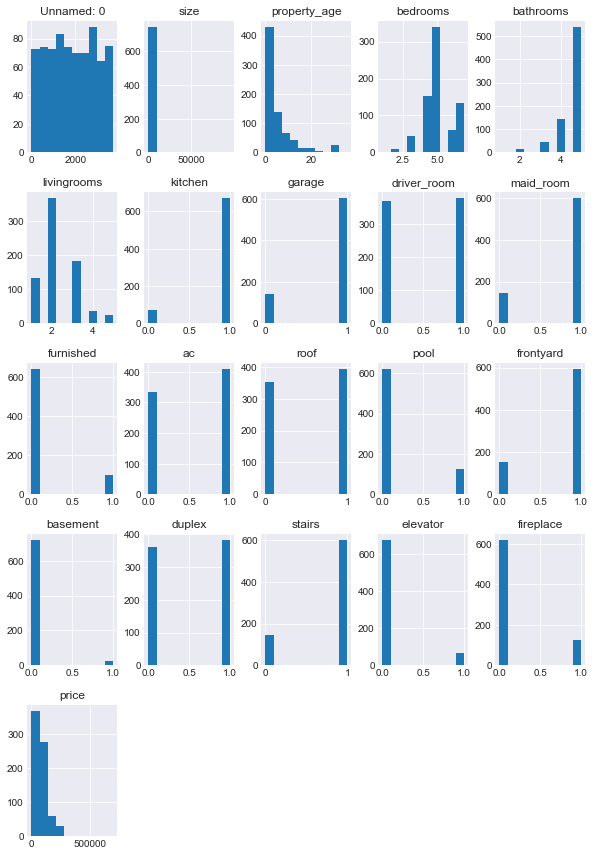

In [41]:
viz = H_test
viz.hist(figsize = (10,15))
plt.show() 

- We noticed earlier that there are some null values in the details column, so we run the below code to count them
- As the null values are in the details column, and when we explored the dataset, we found that the details column is a descriptive column that would not hurt our anlaysis. Thus, we can continue our analysis without droping them.

In [42]:
H_test.isnull().sum()

Unnamed: 0       0
city             0
district         0
front            0
size             0
property_age     0
bedrooms         0
bathrooms        0
livingrooms      0
kitchen          0
garage           0
driver_room      0
maid_room        0
furnished        0
ac               0
roof             0
pool             0
frontyard        0
basement         0
duplex           0
stairs           0
elevator         0
fireplace        0
price            0
details         18
dtype: int64

- Here we want to find the relation between the number of bedrooms and the price regardless of the city the unit is in:

In [43]:
H_test.groupby(['bedrooms']).price.agg(['mean'])

,mean
bedrooms,
1,1000.000000
2,59000.000000
3,84111.222222
4,93992.422078
5,93199.115044
6,73393.442623
7,78395.522388


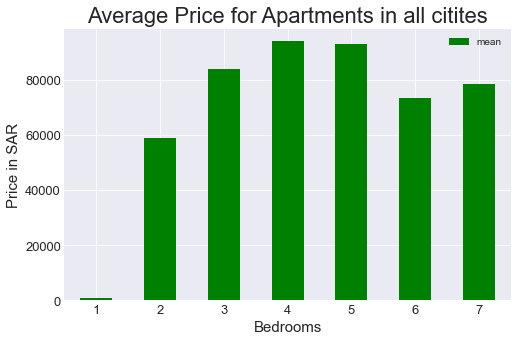

In [44]:
Bedrooms_prices = H_test.groupby(['bedrooms']).price.agg(['mean'])
ax = Bedrooms_prices.plot(kind='bar', figsize=(8,5), color="green", fontsize=13)
plt.style.use('seaborn-darkgrid')
plt.title('Average Price for Apartments in all citites', fontsize=22)
plt.xlabel('Bedrooms', fontsize = 15)
plt.xticks(rotation=0)
plt.ylabel('Price in SAR', fontsize = 15)
plt.show()


- Here, we fruther more explore the relation between number of bedrooms and the price, but here we we even compare the cities in which the apartments are located:

In [45]:
# Average price for aapartment types in all cities
# We also see that الخبر has no 2bed apts listed in our data
H_test.groupby(['city', "bedrooms"]).price.agg(['mean'])

mean
city    bedrooms               
 الخبر  3          65000.000000
        4         112700.000000
        5          75073.170732
        6          59818.181818
        7          68206.896552
 الدمام 3          60000.000000
        4          49320.000000
        5          55884.057971
        6          72357.142857
        7          74134.615385
 الرياض 2          20000.000000
        3          97526.315789
        4          90054.480769
        5          92017.045455
        6          99375.000000
        7          91000.000000
 جدة    1           1000.000000
        2          63333.333333
        3          95200.500000
        4         108296.296296
        5         134850.000000
        6         115833.333333
        7          86129.032258

- In the below bar plot, we are comparing the average number of bedrooms in each city, Riyadh, Jeddah, Dammam, Alkhobar.

Text(0.5, 1.0, 'Average Number of Bedrooms in each City')

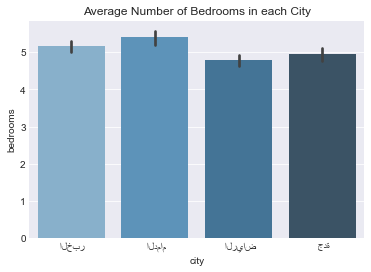

In [46]:
#plt.style.use('seaborn-darkgrid')
sns.barplot(data = H_test, x = 'city', y = 'bedrooms',palette="Blues_d")
plt.title('Average Number of Bedrooms in each City') 

- Heat map to find the correlation between the different features

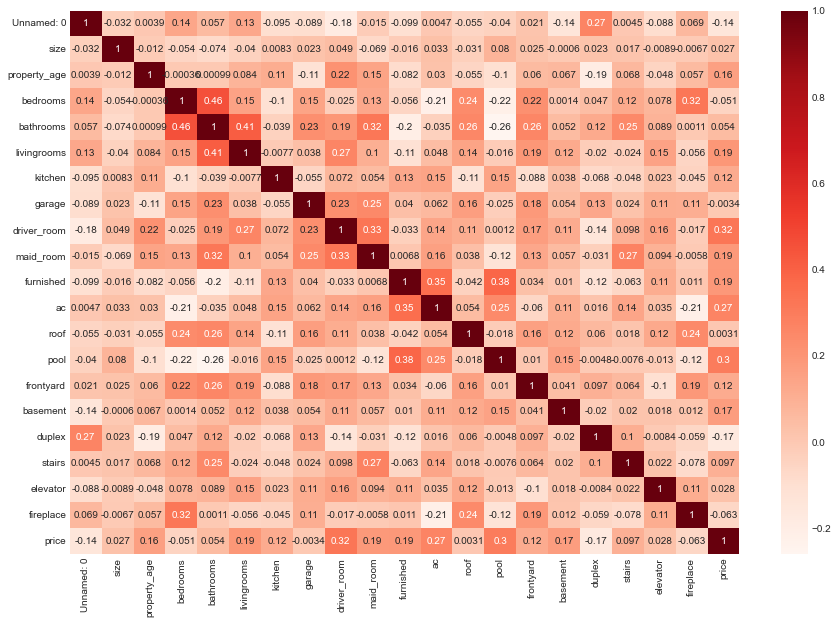

In [47]:
plt.figure(figsize=(15,10))
cor = H_test.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show(); 

- We found that highest corollation is between size and price 

### 4- Data Cleaning:
- First, we noticed a column that has no use in our data, so we decided to drop this column:

In [48]:
H_test.drop('Unnamed: 0', inplace=True, axis=1)

- We also noticed prices that are lower than usual. Then during exploring their details, we found that they were actually monthly prices placed in the price column without being edited as annual prices. 

### Check the rent due frequnecy

- In the details column, some of the rows have information about the rent due frequency, monthly or daily. 
- Therefore, we added a new column to classify the rent frequency IF it is clearly mentioned in the details column. 

In [49]:
def fixRent(details):
    details =  str(details)
    rent = "Unkown"
    if( details.find('شهر') != -1 or details.find('شهري') != -1 or details.find('بالشهر') != -1):
        rent = 'Monthly'
    elif( details.find('يوم') != -1  or details.find('يومي') != -1 or details.find('باليوم') != -1 ):
        rent = 'Daily'
    else:
        rent = 'Unkown'
        
    return rent

H_test.loc[:,'Rent Frequnecy'] = H_test.loc[:,'details'].apply(fixRent)

In [50]:
H_test.groupby(['Rent Frequnecy']).size()

Rent Frequnecy
Daily        4
Monthly     18
Unkown     722
dtype: int64


- Therefore, we defined fixRentAmount formula to look for the observations below 10,000 SAR and multiply them by 12 to get their annual price as most of the observations.

In [51]:
def fixRentAmount(price):

    if( price < 10000):
        price = price * 12
    return price

H_test.loc[:,'price'] = H_test.loc[:,'price'].apply(fixRentAmount)

In [52]:
H_test.loc[:,['price',"details",'Rent Frequnecy']]

,price,details,Rent Frequnecy
0,45000,فيلا للايجار في العزيزية \nالسعر ٤٥ألف ريال \n...,Unkown
1,50000,NaN,Unkown
2,55000,للاجار بيت في حي طيبه زاويه\n\nمكون من \nالدور...,Unkown
3,80000,فلة في الخبر حي التحلية مقابل البحر الدور الا...,Unkown
4,55000,للاجار بيت في حي طيبه زاويه\n\nمكون من \nالدور...,Unkown
...,...,...,...
739,60000,يقع مجمع العائلة في الدمام استراتيجيًا بالقرب ...,Unkown
740,37000,فلا للايجار فى الحي الخامس التاسع \nتتكون ثلاث...,Unkown
741,46000,فله للايجار جديدة ( درج داخلي )\nالدور الارضي ...,Unkown
742,55000,إيجار فيلا حي القادسية مساحة ٢٥٠ متر درج داخلي...,Unkown


- When we took a further look on the Daily rentals, we decided to not fix them to make them monthly or yearly. For example, if we do so in the first unit in the below table, we would have 3000 x 365 = 1,095,000 SAR and it would be an outlier value that would a negative impact on our over all analysis.
- Thus, We decided to keep it with no change in our data as it would be much closer to our cheapest rent price than to the most expensive one. 

In [53]:
H_test[H_test['Rent Frequnecy'] == 'Daily']

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details,Rent Frequnecy
77,جدة,حي الرياض,جنوب,420,6,5,5,2,1,1,...,0,1,0,0,0,0,0,45000,للايجار بعقد يصل إلى ٣ سنوات \nالعقار بمشارف، ...,Daily
275,الخبر,حي العقربية,شمال,420,20,3,4,3,1,0,...,0,0,0,0,0,0,0,55000,فيلا للايجار بالخبر حي العقربية بالقرب من مست...,Daily
314,جدة,حي الشاطئ,غرب,350,0,3,5,2,1,1,...,0,1,0,0,1,0,0,24000,فيلا مؤثثة للإيجار اليومي بالسعر المسجل \nوالس...,Daily
557,جدة,حي الزمرد,شمال,150,10,1,1,1,1,1,...,1,0,0,1,1,1,1,12000,أرقى وأفخم الفيلل للايجار اليومي والسنوي في در...,Daily


In [54]:
Daily_rent = H_test[H_test['Rent Frequnecy'] == 'Daily']
# the prices of the daily rents has been multiplied x12 to fix the monthly prices and to avoid having outliers in our analysis. 
# the actual daily price can bel caluclated using this code: 
Daily_rent['price'].replace([36000, 30000, 130000, 24000, 50000], [36000/12, 30000/12, 130000/12, 24000/12, 50000/12], inplace=True)
# but we are not going to apply on the actual data as the daily rents are only 5 units
# and it would harm our overall model if it is way lower than the minimum rent value.
Daily_rent

/var/folders/p4/sbh49n9d72nf0t33qvwkxvw00000gn/T/ipykernel_12489/323628269.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Daily_rent['price'].replace([36000, 30000, 130000, 24000, 50000], [36000/12, 30000/12, 130000/12, 24000/12, 50000/12], inplace=True)


,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details,Rent Frequnecy
77,جدة,حي الرياض,جنوب,420,6,5,5,2,1,1,...,0,1,0,0,0,0,0,45000,للايجار بعقد يصل إلى ٣ سنوات \nالعقار بمشارف، ...,Daily
275,الخبر,حي العقربية,شمال,420,20,3,4,3,1,0,...,0,0,0,0,0,0,0,55000,فيلا للايجار بالخبر حي العقربية بالقرب من مست...,Daily
314,جدة,حي الشاطئ,غرب,350,0,3,5,2,1,1,...,0,1,0,0,1,0,0,2000,فيلا مؤثثة للإيجار اليومي بالسعر المسجل \nوالس...,Daily
557,جدة,حي الزمرد,شمال,150,10,1,1,1,1,1,...,1,0,0,1,1,1,1,12000,أرقى وأفخم الفيلل للايجار اليومي والسنوي في در...,Daily


### Accomodation Types
- While wr were exploring our data, we found that there are no classification for the kind of unit. Meaning, the dataset does not have a column or a catagory that specify the type of the listed units, is it a house, apartment, or a whole floor? 
- Therefore, we decided to make a new column called "Accomodation Types" that would classify the unit type for us.

In [55]:
def fixTypes(details):
    details =  str(details)
    rent = "Unkown"
    if( details.find('شقه') != -1 or  details.find('شقة') != -1):
        rent = 'apartment'  
    elif( details.find('فله') != -1 or details.find('فلة') != -1 or details.find('فيلا') != -1 or details.find('دبلكس') != -1 
        or details.find('دوبلكس') != -1 or details.find('ڤيلا') != -1 or details.find('فلل') != -1 or details.find('دبلوكسين') != -1 
        or details.find('فلا') != -1 or details.find('فيلا ') != -1 or details.find('دبلوكس ') != -1) or details.find('فلا') != -1 :  
        rent = 'house'
    elif( details.find('دور') != -1 or details.find('دور') != -1 ):
        rent = 'floor'
    else:
        rent = 'Unkown'
        
    return rent

H_test.loc[:,'Accommodation Types'] = H_test.loc[:,'details'].apply(fixTypes)

In [56]:
H_test.groupby(['Accommodation Types']).size()

Accommodation Types
Unkown        50
apartment     13
floor         54
house        627
dtype: int64

In [57]:
H_test.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,frontyard,basement,duplex,stairs,elevator,fireplace,price,details,Rent Frequnecy,Accommodation Types
0,الخبر,حي الصواري,شمال,312,0,5,5,3,0,0,...,1,0,1,1,0,0,45000,فيلا للايجار في العزيزية \nالسعر ٤٥ألف ريال \n...,Unkown,house
1,الدمام,حي ضاحية الملك فهد,شرق,250,0,7,5,3,1,1,...,1,0,1,1,0,0,50000,NaN,Unkown,Unkown
2,الدمام,حي طيبة,شمال غربي,450,4,7,5,2,1,1,...,1,0,0,1,0,1,55000,للاجار بيت في حي طيبه زاويه\n\nمكون من \nالدور...,Unkown,floor
3,الخبر,حي التحلية,شرق,330,0,4,5,4,1,1,...,1,0,0,0,0,0,80000,فلة في الخبر حي التحلية مقابل البحر الدور الا...,Unkown,house
4,الدمام,حي طيبة,شمال غربي,450,4,7,5,2,1,1,...,1,0,0,1,0,1,55000,للاجار بيت في حي طيبه زاويه\n\nمكون من \nالدور...,Unkown,floor


- After making the new Accomodation Types column, we want to have further more explained table that is grouped by the units city, district, type, and average size. 
- We can see that regardless of the accomodation type, size in the Saudi market does not rely on the type of unit. From the table below, we see that floor units can have bigger sizes than houses. Thus, we cannot say that houses are always bigger than floor apartments in the Saudi market.
- Accommodatio type is not a factor that would change the unit size in our data

In [58]:
Multi_features1 = H_test.groupby(['city', 'district','Accommodation Types'])['size'].mean().to_frame()
Multi_features1.sample(15)

size
city    district        Accommodation Types             
 الخبر     حي التحلية   house                 393.750000
 الرياض    حي المحمدية  house                 460.000000
 الدمام    حي المنار    house                 305.882353
 الخبر     حي الصواري   Unkown                300.000000
 الرياض    حي الروضة    house                 900.000000
           حي العليا    Unkown                300.000000
           حي المهدية   house                 420.000000
 الدمام    حي المنتزه   house                 387.000000
 الرياض    حي العقيق    house                 850.000000
           حي القادسية  floor                 367.500000
 جدة       حي الشاطئ    house                7121.000000
 الرياض    حي الرمال    house                 338.666667
           حي الحزم     floor                 320.000000
 الدمام    حي الفرسان   house                 350.000000
           حي الشعلة    house                 313.636364

- Having a deeper look on floor units

In [59]:
d_floor = H_test[H_test['Accommodation Types'] == 'floor']
d_floor

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,frontyard,basement,duplex,stairs,elevator,fireplace,price,details,Rent Frequnecy,Accommodation Types
2,الدمام,حي طيبة,شمال غربي,450,4,7,5,2,1,1,...,1,0,0,1,0,1,55000,للاجار بيت في حي طيبه زاويه\n\nمكون من \nالدور...,Unkown,floor
4,الدمام,حي طيبة,شمال غربي,450,4,7,5,2,1,1,...,1,0,0,1,0,1,55000,للاجار بيت في حي طيبه زاويه\n\nمكون من \nالدور...,Unkown,floor
10,جدة,حي الزمرد,شمال,600,4,5,4,2,1,1,...,1,0,0,0,0,0,45000,يوجد ديوانية بالحوش مع دورة المياة ومواقف للسي...,Unkown,floor
19,الدمام,حي الشاطئ الغربي,شمال,380,0,5,4,1,1,1,...,1,0,0,0,0,0,60000,‏دور ارضي بحي الشاطئ الغربي يتكون من ثلاث غرف ...,Unkown,floor
52,جدة,حي الروضة,غرب,656,0,5,4,4,1,0,...,1,0,0,1,1,0,600000,مبنى اداري فخم حي الروضة\nالدور الأرضي652.80 ...,Unkown,floor
61,الدمام,حي الشاطئ الغربي,شمال,380,0,5,4,1,1,1,...,1,0,0,0,0,0,60000,‏دور ارضي بحي الشاطئ الغربي يتكون من ثلاث غرف ...,Unkown,floor
63,الخبر,حي اللؤلؤ,غرب,330,0,6,4,2,1,0,...,1,0,1,0,0,1,37000,حوش مجلس خارجي مجلس رجال دورة مياة مجلط صاله ...,Unkown,floor
73,الرياض,حي الشرق,جنوب,300,0,5,3,1,1,0,...,1,0,0,1,0,1,38000,دور درج دخلي في مكيفات \n\n\nللايجار يت...,Unkown,floor
78,الدمام,حي الشاطئ الغربي,شمال,380,0,5,4,1,1,1,...,1,0,0,0,0,0,60000,‏دور ارضي بحي الشاطئ الغربي يتكون من ثلاث غرف ...,Unkown,floor
108,الخبر,حي اللؤلؤ,غرب,330,0,6,4,2,1,0,...,1,0,1,0,0,1,37000,حوش مجلس خارجي مجلس رجال دورة مياة مجلط صاله ...,Unkown,floor


(0.0, 1351824.0182456265)

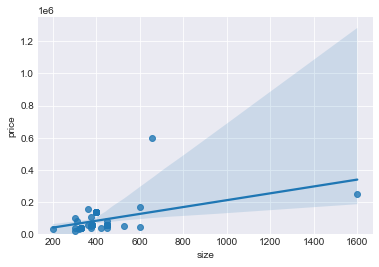

In [60]:
# Engine size as potential predictor variable of price
sns.regplot(x="size", y="price", data=d_floor)
plt.ylim(0,)

#### Correlation between size and price among floor type units
- Here we notice that size does not a significant influnce on the price of the unit as it might be assumed, but this is only among floor type units

In [61]:
d_floor[["size", "price"]].corr()

,size,price
size,1.000000,0.448852
price,0.448852,1.000000


#### Correlation between ac and price among floor type units
- We can infer from the correlation between air condintioner and price that the unit price would actually increase much higher if they have ac than if the unit is bigger in size but does not have an ac system among floor type units.

In [62]:
d_floor[["ac", "price"]].corr()

,ac,price
ac,1.000000,0.394694
price,0.394694,1.000000


#### Correlation between size and price among all accomodation types
- Here we notice that size has a higher impact on price when we find the correlation among all accomodation types

In [63]:
H_test[["size", "price"]].corr()

,size,price
size,1.000000,0.026785
price,0.026785,1.000000


#### Correlation between ac and price among all kind of accomodation types
- Here we see that ac has a much lower impact on price when it is compared to all accomodation types

In [64]:
H_test[["ac", "price"]].corr()

,ac,price
ac,1.000000,0.272933
price,0.272933,1.000000


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

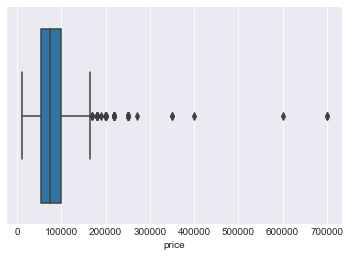

In [65]:
sns.boxplot(H_test['price'])